In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Ritul\Desktop\know it\DBDA\Machine Learning\Day2\diamonds.csv")

In [5]:
df.shape

(53940, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
df_ohe = pd.get_dummies(df)

In [11]:
df_ohe.shape

(53940, 28)

In [14]:
# df_ohe = df_ohe.drop(['Unnamed: 0'],axis=1)
df_ohe = df_ohe.iloc[:,1:]

In [15]:
df_ohe.shape

(53940, 26)

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

In [16]:
X = df_ohe

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test = train_test_split(X,
                                  test_size=0.3,
                                  random_state=7)

In [19]:
X_train.shape,X_test.shape

((37758, 26), (16182, 26))

In [20]:
from sklearn.cluster import KMeans

In [21]:
mykmeans = KMeans(3,random_state=7)

In [22]:
# fit function for training
mykmeans.fit(X_train)

C:\Users\Ritul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=7)

In [23]:
# Do the predictions / testing
cluster_nos = mykmeans.predict(X_test)

In [ ]:
X_test.iloc[0,:]

carat               0.53
depth              63.20
table              55.00
price            1110.00
x                   5.17
y                   5.18
z                   3.27
cut_Fair            0.00
cut_Good            0.00
cut_Ideal           0.00
cut_Premium         0.00
cut_Very Good       1.00
color_D             0.00
color_E             0.00
color_F             1.00
color_G             0.00
color_H             0.00
color_I             0.00
color_J             0.00
clarity_I1          0.00
clarity_IF          0.00
clarity_SI1         0.00
clarity_SI2         1.00
clarity_VS1         0.00
clarity_VS2         0.00
clarity_VVS1        0.00
clarity_VVS2        0.00
Name: 40026, dtype: float64

In [24]:
cluster_nos[0]

2

In [25]:
cluster_nos.shape, X_test.shape

((16182,), (16182, 26))

In [31]:
X_test.loc[cluster_nos == 0,:].shape

(4651, 26)

In [27]:
X_test.loc[cluster_nos == 1,:].shape

(1686, 26)

In [32]:
X_test.loc[cluster_nos == 2,:].shape

(9845, 26)

# How to decide value of k?

we iterate over few values of k ( generally 2 to 10)

plot graph of inertia ( WCSS within cluster sum of squares)

Check the L-bow and decide right k

In [29]:
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

C:\Users\Ritul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [33]:
inertia_values

[171597900902.64096,
 72428985480.46005,
 39904557193.53453,
 26192835058.72429,
 17680891768.538456,
 12718603948.830334,
 9869347654.455975,
 7717299811.812986,
 6314176033.889062]

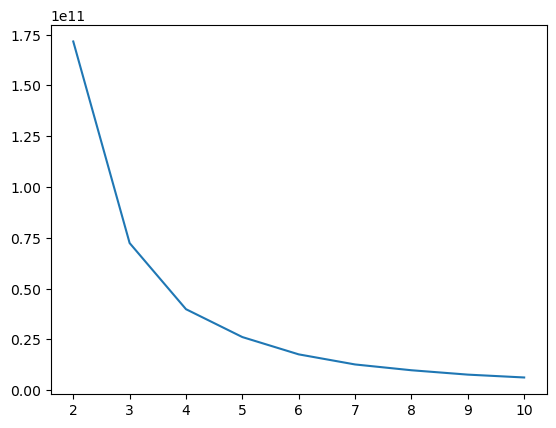

In [34]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

# Evaluation Parameters

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm
silhouette_score(X_test, cluster_nos)

0.6628208250209792